In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
plt.rcParams['font.sans-serif'] = ['SimHei']  #显示中文
plt.rcParams['axes.unicode_minus'] = False  #用来正常显示负号

In [2]:
def weights(x):#计算权重
    newX = MinMaxScaler().fit_transform(x) + 1e-10
    P = newX / newX.sum(axis=0)
    k = 1 / np.log(newX.shape[0])
    ej = -k * (P * np.log(P)).sum(axis=0)
    gj = 1 - ej
    wj = gj / gj.sum()
    return wj
def grade(wj,x):#打分
    return np.dot(x,wj.T)

In [3]:
#测试数据
x,label=make_blobs(centers=4,n_features=6,n_samples=5,random_state=1)#数据
pd.DataFrame(np.abs(x))

,0,1,2,3,4,5
0,6.582201,7.549684,10.569558,3.643766,0.005898,1.915841
1,1.831988,3.528631,9.955499,3.370533,8.165501,7.008504
2,6.542684,2.558430,2.756311,0.379581,2.303282,2.859184
3,0.757969,4.908984,9.096857,4.637076,7.187772,9.088998
4,7.384097,6.925599,5.267733,11.057686,3.680709,3.209457


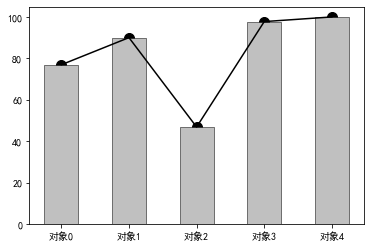

In [18]:
wj=weights(np.abs(x)).round(4)
gg=grade(wj,np.abs(x))/grade(wj,np.abs(x)).max()*100
fig,ax=plt.subplots()
ax.bar(range(5) ,gg,width=0.5,color='silver',edgecolor='black',linewidth=0.5)
ax.plot(range(5) ,gg,color='black')
ax.scatter(range(5) ,gg,s=100,color='k')
plt.axis('on')
plt.xticks(range(5),['对象{}'.format(i) for i in range(5)])
plt.savefig(r'./grade.png',dpi=300)
plt.show()